<a href="https://colab.research.google.com/github/OnurcanKoken/Google-Colaboratory-General-Usage/blob/master/Sound_Classification/Sound_Classification_20210417.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio Basics

Referanslar: 

* M. Yusuf Sarıgöz

* https://www.youtube.com/watch?v=k_fZ8-O01HE

* https://www.tensorflow.org/tutorials/audio/simple_audio

In [ ]:
# the dataset that will be used - download an audio wave file
# ses dosyasını indiriyoruz
!wget https://ccrma.stanford.edu/workshops/mir2014/audio/BD%20Cln%20Strumming%2022_mono.wav -O audio.wav

--2021-04-17 19:09:06--  https://ccrma.stanford.edu/workshops/mir2014/audio/BD%20Cln%20Strumming%2022_mono.wav
Resolving ccrma.stanford.edu (ccrma.stanford.edu)... 171.64.197.141
Connecting to ccrma.stanford.edu (ccrma.stanford.edu)|171.64.197.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 749040 (731K) [audio/x-wav]
Saving to: ‘audio.wav’

audio.wav           100%[===================>] 731.48K  3.74MB/s    in 0.2s    

2021-04-17 19:09:06 (3.74 MB/s) - ‘audio.wav’ saved [749040/749040]



In [ ]:
# to be able to work with audio files
# ses dosyaları üzerinde çalışmamızı sağlayan ve yaygın kullanılan bir kütüphane
#!pip install librosa # no need to install for Colab usage
import librosa

In [ ]:
# to load the audio file for python
# sampling rate -> sr - örnekleme hızı, ölçüm sıklığı arttıkça ses kalitesi artıyor
# sound data -> y - commonly used variable for sound data - ses verisi için genellikle kullanılan değişken
y, sr = librosa.load('audio.wav')

In [ ]:
# 16000 is enough for speach models
# saniyede 16 bin ölçüm yeterli
# bit değerleri 16 bin sampling rate integer değerinde olacak,
# -32768 ile +32768 arası değerler alacak çünkü 16 bit, 2^16 = 65536
# telefon protokolleri genelde 8bin kHz'te, kalite düşüyor ama gene de anlaşılıyor
# müzik için 22050 nin altı kaliteli değil, daha yüksek sampling rate olması çok daha iyi
print("Sampling rate", sr) 

Sampling rate 22050


In [ ]:
# 1D array numpy dizisi
# numpy nd array
# tek kanallı, mono bir ses
# birden fazla kanal içerseydi her biri için ayrı boyutlar olacaktı
# genellikle mono ses üzerinden işlemler yapılıyor, tek kanal değilse de teke indiriliyor
# integer'lar ile ses verileri tutuluyor olsa da sinyal işleme ses verisini okuyunca
# -1 ile 1 arasında normalize ediyor, bu nedenle float görüyoruz veri tipini şu an
print("Audio shape", y.shape, "\tAudio dtype", y.dtype)

Audio shape (187249,) 	Audio dtype float32


In [ ]:
# ses verisinin ilk 50 değeri
# scientific notation is used here, bilimsel gösterimi kullanılmış çok sıfır olacağından
# e-05 -> 10^-5
y[:50]

array([-4.85159944e-05, -6.26320718e-04,  1.17796277e-04,  3.04821110e-03,
        5.45567600e-03,  5.79631422e-03,  4.96526156e-03,  4.43725986e-03,
        5.58414357e-03,  8.17424618e-03,  1.01689203e-02,  1.08958455e-02,
        1.22226328e-02,  1.49453832e-02,  1.53251328e-02,  1.14461333e-02,
        8.66936799e-03,  1.15512358e-02,  1.74402222e-02,  1.99394543e-02,
        1.68384034e-02,  1.19271018e-02,  8.23449623e-03,  6.46920316e-03,
        7.57522741e-03,  1.14395265e-02,  1.57195143e-02,  1.71960201e-02,
        1.52824307e-02,  1.30537227e-02,  1.27298385e-02,  1.32379057e-02,
        1.37843601e-02,  1.45376297e-02,  1.42760305e-02,  1.20135266e-02,
        8.84789415e-03,  7.83354696e-03,  8.19887314e-03,  6.11045863e-03,
        2.90401070e-03,  1.75989571e-03,  2.12048041e-03,  2.14371388e-03,
        9.65312240e-04, -1.67467108e-03, -4.86566639e-03, -7.43355229e-03,
       -8.83954857e-03, -1.03045730e-02], dtype=float32)

In [ ]:
 # bazı dönüşümlerde gerekli olabiliyor
 # ses verilerini tek bir formata indirgemek için
 # hepsi 16 bit, 16 kHz olacak şekilde dönüştürülebiliyor
 # video içinden ses dosyasını çekebilirsiniz
 # ffmpeg daha kolay kullanımı bu tarz büyük verileri dönüştürmede
 #!apt install ffmpeg

In [ ]:
# okuduğumuz ses verisinin süresini alıyoruz
# obtain the duration of the audio
duration = librosa.get_duration(y, sr = sr)
print("Audio duration in seconds", duration)

Audio duration in seconds 8.492018140589568


In [ ]:
# to be able to visualise sound data results
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

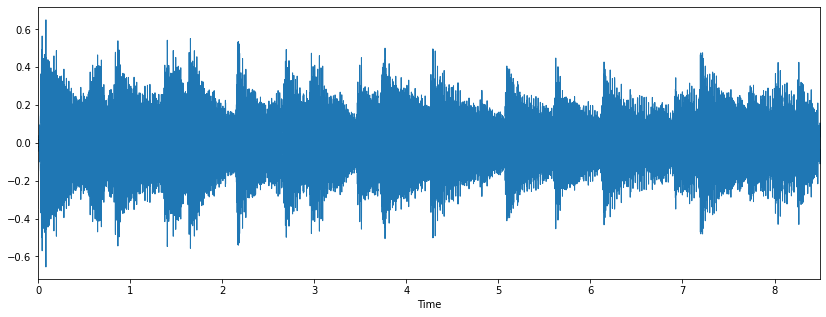

In [ ]:
# display the audio
# özellikle birden fazla ses verilerini karşılaştırırken kullanılabilir
# ortak özelliklerini inceleyip tespit edebilirsin
plt.figure(figsize=(14,5))
librosa.display.waveplot(y, sr=sr)

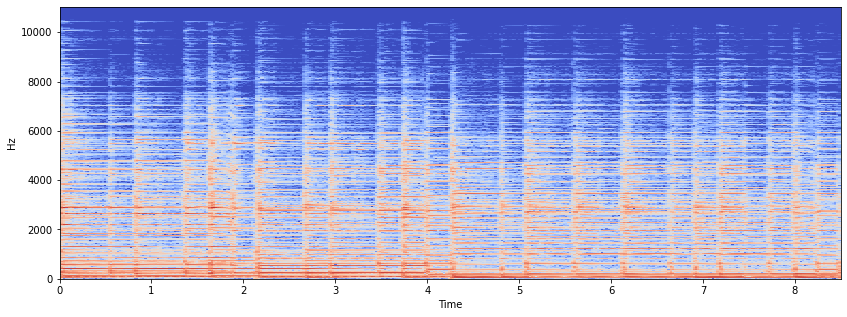

In [ ]:
# time domain to frequency domain
# short time fourier transform
x_stft = librosa.stft(y)
# only magnitude is our interest here
x_db = librosa.amplitude_to_db(abs(x_stft))
plt.figure(figsize=(14,5))
# now we have 2D array
librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')

In [ ]:
# play the audio file
import IPython.display as ipd
# by using path of the audio file
ipd.Audio('audio.wav')

In [ ]:
# the same with the above
# by using sound data y and sampling rate instead of using audio file
ipd.Audio(y, rate=sr)

In [ ]:
# to be able to save the audio file 
import soundfile

In [ ]:
# save the audio file by using sound data y and sampling rate
soundfile.write('audio2.wav', y, sr)

In [ ]:
!ls

audio2.wav  audio.wav  sample_data


In [ ]:
ipd.Audio('audio2.wav')

# Sound Classification

In [ ]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display


# Set seed for experiment reproducibility
# 2. kez çalıştırdığımızda da aynı sonuçları alabilmek için kullanılıyor
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [ ]:
# import mini speech command dataset
# This data was collected by Google and released under a CC BY license
data_dir = pathlib.Path("data/mini_speech_commands")
if not data_dir.exists():
  tf.keras.utils.get_file(
      'mini_speech_commands.zip',
      origin="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip",
      extract=True,
      cache_dir='.', cache_subdir='data')

182083584/182082353 [==============================] - 1s 0us/step


In [ ]:
# toplamda 8 kategoriden oluşan veri seti
# 8 categories
# basic statistics about the dataset
commands = np.array(tf.io.gfile.listdir(str(data_dir)))
commands = commands[commands != 'README.md']
print('Commands:', commands)

Commands: ['go' 'yes' 'up' 'right' 'down' 'no' 'stop' 'left']


In [ ]:
# indirdiğimiz veri setinde kaç tane dosya var - 8000 total
# her sınıfa ait kaç ses dosyası var - 1000 each
# extract the audio files into a list and shuffle it
filenames = tf.io.gfile.glob(str(data_dir) + '/*/*')
filenames = tf.random.shuffle(filenames)
num_samples = len(filenames)
print('Number of total examples:', num_samples)
print('Number of examples per label:',
      len(tf.io.gfile.listdir(str(data_dir/commands[0]))))
print('Example file tensor:', filenames[0])

Number of total examples: 8000
Number of examples per label: 1000
Example file tensor: tf.Tensor(b'data/mini_speech_commands/no/f17be97f_nohash_2.wav', shape=(), dtype=string)


In [ ]:
# seperate the dataset
# veri setimizi ayırıyoruz
# 80% train, 10% validation, 10% test
train_files = filenames[:6400]
val_files = filenames[6400: 6400 + 800]
test_files = filenames[-800:]

print('Training set size', len(train_files))
print('Validation set size', len(val_files))
print('Test set size', len(test_files))

Training set size 6400
Validation set size 800
Test set size 800


In [ ]:
# tf.audio.decode_wav returns the WAV-encoded audio as a Tensor and the sample rate
# A WAV file contains time series data with a set number of samples per second
# Each sample represents the amplitude of the audio signal at that specific time
def decode_audio(audio_binary):
  audio, _ = tf.audio.decode_wav(audio_binary)
  return tf.squeeze(audio, axis=-1)

In [ ]:
# The label for each WAV file is its parent directory
def get_label(file_path):
  parts = tf.strings.split(file_path, os.path.sep)

  # Note: You'll use indexing here instead of tuple unpacking to enable this
  # to work in a TensorFlow graph
  # -1. index'te dosya adı var
  # -2. index'te etiket adı var
  return parts[-2]

In [ ]:
# A method that will take in the filename of the WAV file and output a tuple containing 
# the audio and labels for supervised training
def get_waveform_and_label(file_path):
  label = get_label(file_path)
  # binary form
  audio_binary = tf.io.read_file(file_path)
  # convert binary form to waveform
  waveform = decode_audio(audio_binary)
  return waveform, label

In [ ]:
# ses dalgalarından ve etiketlerden oluşan bir training veriseti elde ediyoruz
# build your training set to extract the audio-label pairs and check the results
AUTOTUNE = tf.data.AUTOTUNE
files_ds = tf.data.Dataset.from_tensor_slices(train_files)
waveform_ds = files_ds.map(get_waveform_and_label, num_parallel_calls=AUTOTUNE)

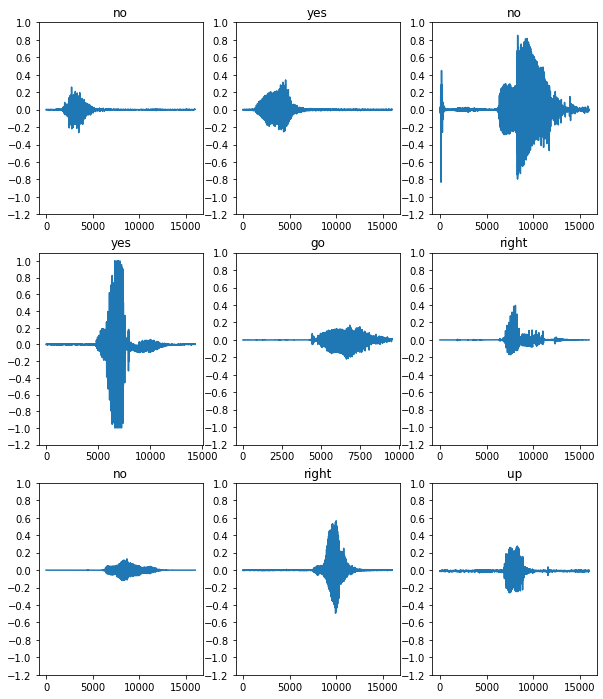

In [ ]:
# 9 ses verisini, örneğini alarak görselleştirip etiketlerini yazıyoruz
# examine a few audio waveforms with their corresponding labels
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
for i, (audio, label) in enumerate(waveform_ds.take(n)):
  r = i // cols  
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2)) 
  label = label.numpy().decode('utf-8')
  ax.set_title(label)

plt.show()

**Spectogram** shows frequency changes over time and can be represented as a 2D image

It can be done by applying the **Short-Time Fourier Transform** (STFT) to convert the audio into the time-frequency domain

In [ ]:
def get_spectrogram(waveform):
  # Padding for files with less than 16000 samples
  zero_padding = tf.zeros([16000] - tf.shape(waveform), dtype=tf.float32)

  # Concatenate audio with padding so that all audio clips will be of the 
  # same length
  waveform = tf.cast(waveform, tf.float32)
  equal_length = tf.concat([waveform, zero_padding], 0)
  spectrogram = tf.signal.stft(
      equal_length, frame_length=255, frame_step=128)

  spectrogram = tf.abs(spectrogram)

  return spectrogram

In [ ]:
# explore the data
# Compare the waveform, the spectrogram and the actual audio of one example from the dataset
for waveform, label in waveform_ds.take(1):
  label = label.numpy().decode('utf-8')
  spectrogram = get_spectrogram(waveform)

print('Label:', label)
print('Waveform shape:', waveform.shape)
print('Spectrogram shape:', spectrogram.shape)
print('Audio playback')
display.display(display.Audio(waveform, rate=16000))

In [ ]:
def plot_spectrogram(spectrogram, ax):
  # Convert to frequencies to log scale and transpose so that the time is
  # represented in the x-axis (columns).
  log_spec = np.log(spectrogram.T)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)


fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])
plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

In [ ]:
# ses verilerinden feature lar çıkartarak ML'de kullanıyoruz
# transform the waveform dataset to have spectrogram images and their corresponding labels as integer IDs
def get_spectrogram_and_label_id(audio, label):
  spectrogram = get_spectrogram(audio)
  spectrogram = tf.expand_dims(spectrogram, -1)
  label_id = tf.argmax(label == commands)
  return spectrogram, label_id 

In [ ]:
spectrogram_ds = waveform_ds.map(
    get_spectrogram_and_label_id, num_parallel_calls=AUTOTUNE)

In [ ]:
# 3x3 display spectrogram
# examine the spectrogram "images" for different samples of the dataset
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
  r = i // cols  
  c = i % cols
  ax = axes[r][c]
  plot_spectrogram(np.squeeze(spectrogram.numpy()), ax)
  ax.set_title(commands[kabek_id.numpy()])
  ax.axis('off')
  
plt.show()

**Build and train the model**

In [ ]:
# need to repeat the training set preprocessing on the validation and test sets
def preprocess_dataset(files):
  files_ds = tf.data.Dataset.from_tensor_slices(files)
  output_ds = files_ds.map(get_waveform_and_label, num_parallel_calls=AUTOTUNE)
  output_ds = output_ds.map(
      get_spectrogram_and_label_id,  num_parallel_calls=AUTOTUNE)
  return output_ds

In [ ]:
train_ds = spectrogram_ds
val_ds = preprocess_dataset(val_files)
test_ds = preprocess_dataset(test_files)

In [ ]:
# batch the training and validation sets for model training
batch_size = 64
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [ ]:
# add dataset cache() and prefetch() operations 
# to reduce read latency while training the model
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

In [ ]:
for spectrogram, _ in spectrogram_ds.take(1):
  input_shape = spectrogram.shape
print('Input shape:', input_shape)
num_labels = len(commands)

norm_layer = preprocessing.Normalization()
norm_layer.adapt(spectrogram_ds.map(lambda x, _: x))

model = models.Sequential([
    layers.Input(shape=input_shape),
    preprocessing.Resizing(32, 32), 
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
])

model.summary()

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [ ]:
EPOCHS = 10
history = model.fit(
    train_ds, 
    validation_data=val_ds,  
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

**Evaluate test set performance**

In [ ]:
# run the model on the test set and check performance
test_audio = []
test_labels = []

for audio, label in test_ds:
  test_audio.append(audio.numpy())
  test_labels.append(label.numpy())

test_audio = np.array(test_audio)
test_labels = np.array(test_labels)

In [ ]:
y_pred = np.argmax(model.predict(test_audio), axis=1)
y_true = test_labels

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

**Display a Confusion Matrix** that is helpful to see how well the model did on each of the commands in the test set

In [ ]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=commands, yticklabels=commands, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

**Run inference on an audio file**

In [ ]:
# verify the model's prediction output using an input audio file of someone saying "no."
# How well does your model perform?
sample_file = data_dir/'no/01bb6a2a_nohash_0.wav'

sample_ds = preprocess_dataset([str(sample_file)])

for spectrogram, label in sample_ds.batch(1):
  prediction = model(spectrogram)
  plt.bar(commands, tf.nn.softmax(prediction[0]))
  plt.title(f'Predictions for "{commands[label[0]]}"')
  plt.show()